In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [9]:
data = pd.read_csv('data/Killings_per_year.csv')

In [160]:
df = pd.DataFrame(data)
df.drop(axis=0, index=0, inplace=True)
df.rename(columns={
    'Breakdown': 'Police', 
    'Breakdown.1': 'Military', 
    'Breakdown.2': 'Intelligence agencies', 
    'Breakdown.3': 'Other',
    'People killed bysecurity forces': 'People_killed_by_security_forces',
    'Country (or dependent territory, subnational area, etc.)': 'Country'
}, inplace=True)
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 1 to 62
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country                           62 non-null     object
 1   Region                            62 non-null     object
 2   People_killed_by_security_forces  61 non-null     object
 3   Police                            35 non-null     object
 4   Military                          30 non-null     object
 5   Intelligence agencies             30 non-null     object
 6   Other                             31 non-null     object
 7   Population                        62 non-null     object
 8   Rate per 10 million people        62 non-null     object
 9   Year listed                       62 non-null     object
 10  Notes                             21 non-null     object
 11  Source                            61 non-null     object
dtypes: object(12)
memory usa

In [161]:
df['People_killed_by_security_forces'] = df['People_killed_by_security_forces'].str.replace('+', '')
df['People_killed_by_security_forces'] = df['People_killed_by_security_forces'].str.replace(',', '')
df

C:\Users\Adriano\AppData\Local\Temp/ipykernel_20712/343462613.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,Country,Region,People_killed_by_security_forces,Police,Military,Intelligence agencies,Other,Population,Rate per 10 million people,Year listed,Notes,Source
1,Venezuela,Americas,NaN,NaN,NaN,NaN,NaN,"28,887,118",1829.9,2019,NaN,[1][2]
2,El Salvador,Americas,1087,NaN,NaN,NaN,NaN,"6,380,000",1703.8,2017,NaN,[3][4]
3,Syria,Asia,1497,NaN,NaN,NaN,NaN,"18,270,000",819,2019,In the context of the Syrian civil war,[5]
4,Philippines,Asia,6069,NaN,NaN,NaN,NaN,"109,048,269",556.5,2016-2021,"These are just the ""Drug personalities who die...",[6]
5,Nicaragua,Americas,325,NaN,NaN,NaN,NaN,"6,218,000",522.7,2018,Up to 535,[7]
6,Jamaica,Americas,137,133,4,0,0,"2,898,000",472.7,2018,NaN,[8]
7,Trinidad and Tobago,Americas,46,46,0,0,0,"1,354,000",339.7,2014,NaN,[9]
8,Brazil,Americas,5804,NaN,NaN,NaN,NaN,"210,147,125",276.2,2019,NaN,[10]
9,Bahamas,Americas,11,11,0,0,0,"399,285",275.7,2018,NaN,[11]
10,Saint Vincent and the Grenadines,Americas,2,2,0,0,0,"110,211",181.8,2018,NaN,[12]


In [162]:
df.fillna(0, inplace=True)
df

,Country,Region,People_killed_by_security_forces,Police,Military,Intelligence agencies,Other,Population,Rate per 10 million people,Year listed,Notes,Source
1,Venezuela,Americas,0,0,0,0,0,"28,887,118",1829.9,2019,0,[1][2]
2,El Salvador,Americas,1087,0,0,0,0,"6,380,000",1703.8,2017,0,[3][4]
3,Syria,Asia,1497,0,0,0,0,"18,270,000",819,2019,In the context of the Syrian civil war,[5]
4,Philippines,Asia,6069,0,0,0,0,"109,048,269",556.5,2016-2021,"These are just the ""Drug personalities who die...",[6]
5,Nicaragua,Americas,325,0,0,0,0,"6,218,000",522.7,2018,Up to 535,[7]
6,Jamaica,Americas,137,133,4,0,0,"2,898,000",472.7,2018,0,[8]
7,Trinidad and Tobago,Americas,46,46,0,0,0,"1,354,000",339.7,2014,0,[9]
8,Brazil,Americas,5804,0,0,0,0,"210,147,125",276.2,2019,0,[10]
9,Bahamas,Americas,11,11,0,0,0,"399,285",275.7,2018,0,[11]
10,Saint Vincent and the Grenadines,Americas,2,2,0,0,0,"110,211",181.8,2018,0,[12]


In [163]:
df['People_killed_by_security_forces'] = df['People_killed_by_security_forces'].astype(int)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 1 to 62
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country                           62 non-null     object
 1   Region                            62 non-null     object
 2   People_killed_by_security_forces  62 non-null     int32 
 3   Police                            62 non-null     object
 4   Military                          62 non-null     object
 5   Intelligence agencies             62 non-null     object
 6   Other                             62 non-null     object
 7   Population                        62 non-null     object
 8   Rate per 10 million people        62 non-null     object
 9   Year listed                       62 non-null     object
 10  Notes                             62 non-null     object
 11  Source                            62 non-null     object
dtypes: int32(1), object(11)


In [165]:
df.sort_values(by=['People_killed_by_security_forces'], inplace=True)
df

,Country,Region,People_killed_by_security_forces,Police,Military,Intelligence agencies,Other,Population,Rate per 10 million people,Year listed,Notes,Source
1,Venezuela,Americas,0,0,0,0,0,"28,887,118",1829.9,2019,0,[1][2]
60,Denmark,Europe,0,0,0,0,0,"5,805,000",0,2019,0,[76]
61,Iceland,Europe,0,0,0,0,0,"350,000",0,2016,2013 was the only year in which police killed ...,[77]
62,Switzerland,Europe,0,-,-,-,-,"8,420,000",0,2018,0,[78]
48,Norway,Europe,1,1,0,0,0,"5,258,000",1.9,2016,0,[62]
39,Malta,Europe,1,0,1,0,0,"493,559",20.0,2019,0,[44]
53,Hong Kong,Asia,1,1,0,0,0,"7,392,000",1.3,2019,See also: List of killings by law enforcement ...,[67]
54,Portugal,Europe,1,1,0,0,0,"10,290,000",1.0,2018,0,[68]
47,New Zealand,Oceania,1,1,0,0,0,"4,794,000",2.1,2018,One additional death ruled inconclusive,[61]
55,Sweden,Europe,1,1,0,0,0,"10,327,589",1.0,2019,0,[69]


In [194]:
fig = px.bar(df, x='People_killed_by_security_forces', y='Country', orientation='h')
fig.update_layout(
    autosize=False,
    width=1000,
    height=800)
fig.update_traces(width=1)
fig.show()

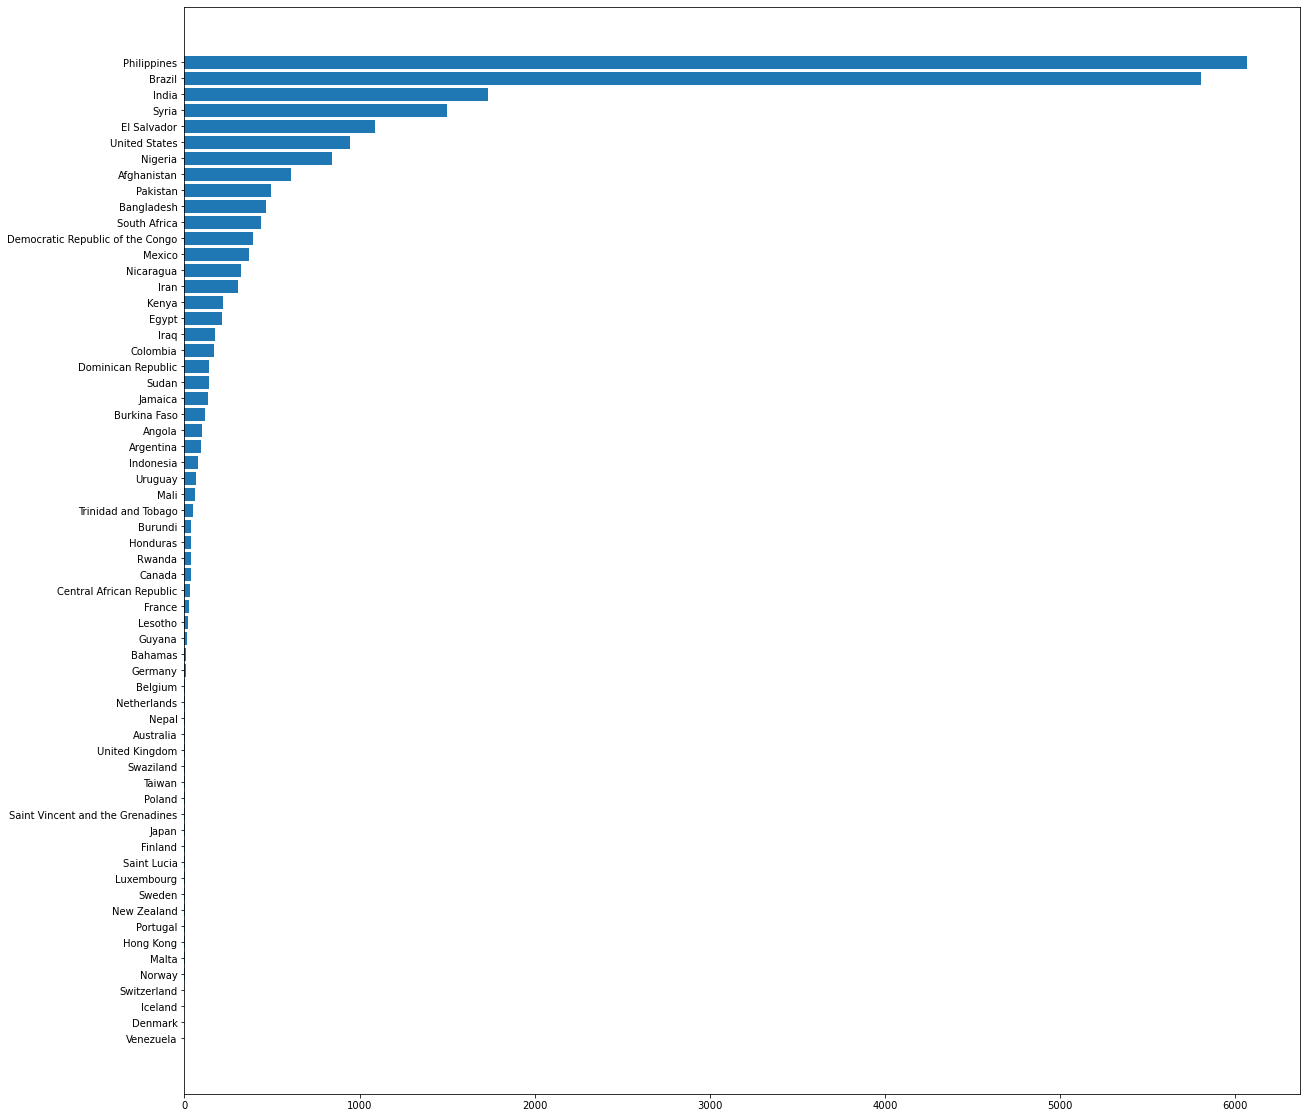

In [180]:
y = df['People_killed_by_security_forces']
plt.figure(figsize=(20,20))
fig2 = plt.barh(y=df['Country'], width=y)
